In [1]:
import pandas as pd

val_df = pd.read_json('/home/vhoudebine/projects/raft/data/training_data/vampires_test_with_metadata.json', lines=True)
val_df.head()

,id,type,question,context,oracle_context,cot_answer,instruction,messages
0,seed_task_332,general,Why do contemporary vampire-hunting societies ...,{'sentences': [['An alternate explanation for ...,Vampire were released during the jiangshi cine...,"To answer the question ""Why do contemporary va...",<DOCUMENT>An alternate explanation for noise i...,"[{'role': 'user', 'content': '<DOCUMENT>An alt..."
1,seed_task_249,general,Which Yugoslav horror film from 1973 was inspi...,{'sentences': [['She appeared as an attractive...,The character was later used in the story Afte...,"To answer the question, we need to identify th...",<DOCUMENT>She appeared as an attractivewoman w...,"[{'role': 'user', 'content': '<DOCUMENT>She ap..."
2,seed_task_394,general,Is the consumption of blood effective in easin...,"{'sentences': [['In 1932, an unsolved murder c...",Thus vampires were merely sufferers of porphyr...,"To answer the question ""Is the consumption of ...","<DOCUMENT>In 1932, an unsolved murder case inS...","[{'role': 'user', 'content': '<DOCUMENT>In 193..."
3,seed_task_147,general,What precaution was taken in Romania as recent...,"{'sentences': [['Despite this condemnation, th...","In Romania, garlic could be placed in the mout...",To answer the question about the precaution ta...,"<DOCUMENT>Despite this condemnation, the vampi...","[{'role': 'user', 'content': '<DOCUMENT>Despit..."
4,seed_task_501,general,"In what year was ""The Vampyre"" published?","{'sentences': [['The modern word ""Vampire"" is ...","Irvyne (1811) about a reanimated corpse, Siste...","To determine the year ""The Vampyre"" was publis...","<DOCUMENT>The modern word ""Vampire"" is derived...","[{'role': 'user', 'content': '<DOCUMENT>The mo..."


In [18]:
from dotenv import load_dotenv
import os
from openai import AzureOpenAI


load_dotenv()
# run the base and finetuned models through the dataset
BASELINE_OPENAI_DEPLOYMENT = os.getenv("BASELINE_OPENAI_DEPLOYMENT")
BASELINE_OPENAI_ENDPOINT= os.getenv("BASELINE_OPENAI_ENDPOINT")
BASELINE_OPENAI_KEY= os.getenv("BASELINE_OPENAI_KEY")

FINETUNED_OPENAI_DEPLOYMENT = os.getenv("FINETUNED_OPENAI_DEPLOYMENT")
FINETUNED_OPENAI_ENDPOINT = os.getenv("FINETUNED_OPENAI_ENDPOINT")
FINETUNED_OPENAI_KEY = os.getenv("FINETUNED_OPENAI_KEY")

baseline_client = AzureOpenAI(
    azure_endpoint=BASELINE_OPENAI_ENDPOINT, 
    api_key=BASELINE_OPENAI_KEY,
    api_version="2024-02-01"
    )

finetuned_client = AzureOpenAI(
    azure_endpoint=FINETUNED_OPENAI_ENDPOINT, 
    api_key=FINETUNED_OPENAI_KEY,
    api_version="2024-02-01"

    )

# get the predictions
def get_model_completions(client, prompt, deployment):
    messages = [
        {'role':'user','content':prompt}
        ]
    try:
        response = client.chat.completions.create(
        messages=messages,
        model=deployment,
        temperature=0.3,
    )
    
        return response.choices[0].message.content

    except Exception as e:
        print(e)
        pass
    


In [19]:

from tqdm.notebook import tqdm

tqdm.pandas()

val_df['baseline_model_response'] = val_df.progress_apply(lambda x: get_model_completions(baseline_client, x.instruction, BASELINE_OPENAI_DEPLOYMENT), axis=1)
val_df['finetuned_model_response'] = val_df.progress_apply(lambda x: get_model_completions(finetuned_client, x.instruction, FINETUNED_OPENAI_DEPLOYMENT), axis=1)

  0%|          | 0/127 [00:00<?, ?it/s]

Error code: 400 - {'error': {'message': "The response was filtered due to the prompt triggering Azure OpenAI's content management policy. Please modify your prompt and retry. To learn more about our content filtering policies please read our documentation: https://go.microsoft.com/fwlink/?linkid=2198766", 'type': None, 'param': 'prompt', 'code': 'content_filter', 'status': 400, 'innererror': {'code': 'ResponsibleAIPolicyViolation', 'content_filter_result': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': True, 'severity': 'medium'}}}}}
Error code: 400 - {'error': {'message': "The response was filtered due to the prompt triggering Azure OpenAI's content management policy. Please modify your prompt and retry. To learn more about our content filtering policies please read our documentation: https://go.micros

  0%|          | 0/127 [00:00<?, ?it/s]

Error code: 400 - {'error': {'message': "The response was filtered due to the prompt triggering Azure OpenAI's content management policy. Please modify your prompt and retry. To learn more about our content filtering policies please read our documentation: https://go.microsoft.com/fwlink/?linkid=2198766", 'type': None, 'param': 'prompt', 'code': 'content_filter', 'status': 400, 'innererror': {'code': 'ResponsibleAIPolicyViolation', 'content_filter_result': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': True, 'severity': 'medium'}}}}}
Error code: 400 - {'error': {'message': "The response was filtered due to the prompt triggering Azure OpenAI's content management policy. Please modify your prompt and retry. To learn more about our content filtering policies please read our documentation: https://go.micros

In [21]:
val_df.to_json('/home/vhoudebine/projects/raft/data/training_data/vampires_eval.json', lines=True, orient='records')

In [20]:
val_df.head()

,id,type,question,context,oracle_context,cot_answer,instruction,messages,baseline_model_response,finetuned_model_response
0,seed_task_332,general,Why do contemporary vampire-hunting societies ...,{'sentences': [['An alternate explanation for ...,Vampire were released during the jiangshi cine...,"To answer the question ""Why do contemporary va...",<DOCUMENT>An alternate explanation for noise i...,"[{'role': 'user', 'content': '<DOCUMENT>An alt...",Contemporary vampire-hunting societies exist p...,"To answer the question ""Why do contemporary va..."
1,seed_task_249,general,Which Yugoslav horror film from 1973 was inspi...,{'sentences': [['She appeared as an attractive...,The character was later used in the story Afte...,"To answer the question, we need to identify th...",<DOCUMENT>She appeared as an attractivewoman w...,"[{'role': 'user', 'content': '<DOCUMENT>She ap...",The Yugoslav horror film from 1973 inspired by...,"To answer the question ""Which Yugoslav horror ..."
2,seed_task_394,general,Is the consumption of blood effective in easin...,"{'sentences': [['In 1932, an unsolved murder c...",Thus vampires were merely sufferers of porphyr...,"To answer the question ""Is the consumption of ...","<DOCUMENT>In 1932, an unsolved murder case inS...","[{'role': 'user', 'content': '<DOCUMENT>In 193...","No, the consumption of blood is not effective ...","To answer the question ""Is the consumption of ..."
3,seed_task_147,general,What precaution was taken in Romania as recent...,"{'sentences': [['Despite this condemnation, th...","In Romania, garlic could be placed in the mout...",To answer the question about the precaution ta...,"<DOCUMENT>Despite this condemnation, the vampi...","[{'role': 'user', 'content': '<DOCUMENT>Despit...","In Romania, as recently as the 19th century, a...",To answer the question about the precaution ta...
4,seed_task_501,general,"In what year was ""The Vampyre"" published?","{'sentences': [['The modern word ""Vampire"" is ...","Irvyne (1811) about a reanimated corpse, Siste...","To determine the year ""The Vampyre"" was publis...","<DOCUMENT>The modern word ""Vampire"" is derived...","[{'role': 'user', 'content': '<DOCUMENT>The mo...","""The Vampyre"" was published in 1819.","To determine the year ""The Vampyre"" was publis..."


In [3]:
import os
from promptflow.core import AzureOpenAIModelConfiguration

azure_endpoint = os.environ.get("AZURE_OPENAI_API_ENDPOINT")
api_key = os.environ.get("AZURE_OPENAI_API_KEY")
azure_deployment = "gpt-4o-global"
api_version = "2024-02-01"

print("azure_endpoint=" + azure_endpoint)
print("azure_deployment=" + azure_deployment)
print("api_version=" + api_version)

# Initialize Azure OpenAI Connection
model_config = AzureOpenAIModelConfiguration(
    azure_endpoint=azure_endpoint,
    api_key=api_key,
    azure_deployment=azure_deployment,
    api_version=api_version,
)

azure_endpoint=https://vh-aoai.openai.azure.com
azure_deployment=gpt-4o-global
api_version=2024-02-01


In [4]:
val_df = pd.read_json('/home/vhoudebine/projects/raft/data/training_data/vampires_eval.json', lines=True)

In [31]:
from promptflow.evals.evaluators import RelevanceEvaluator, SimilarityEvaluator, GroundednessEvaluator, F1ScoreEvaluator

# Initializing evaluators
similarity = SimilarityEvaluator(model_config)
groundedness = GroundednessEvaluator(model_config)
f1_score=F1ScoreEvaluator()


In [8]:
val_df.finetuned_model_response.values[0]
val_df.cot_answer.values[0]

'To answer the question "Why do contemporary vampire-hunting societies exist?" using the provided context, follow these steps:\n\n1. Identify the relevant information in the context that directly addresses the existence and purpose of contemporary vampire-hunting societies.\n2. Extract and analyze the specific sentences that explain why these societies are formed.\n3. Summarize the extracted information to provide a clear and concise answer.\n\nStep-by-step reasoning:\n\n1. The context mentions that vampire-hunting societies still exist.\n2. It specifies the reason for their existence: ##begin_quote## "Vampire-hunting societies still exist, but they are largely formed for social reasons." ##end_quote##\n3. This indicates that the primary purpose of these societies is social rather than practical or based on actual vampire threats.\n\n<ANSWER>: Contemporary vampire-hunting societies exist largely for social reasons.'

In [11]:
def extract_final_answer(cot_answer: str) -> str:
    """
    Extracts the final answer from the cot_answer field
    """
    if cot_answer:
        return cot_answer.split("<ANSWER>: ")[-1]
    return None

def extract_context(instruction: str) -> str:
    """
    Extracts the context from the instruction field.
    Keeps all <DOCUMENTS/> and removes the last line with the question.
    """
    return "\n".join(instruction.split("\n")[:-1])

val_df['gold_final_answer'] = val_df.cot_answer.apply(extract_final_answer)
val_df.rename(columns={'context':'context_docs'}, inplace=True)
val_df['context'] = val_df.instruction.apply(extract_context)
val_df['baseline_final_answer'] = val_df.baseline_model_response.apply(extract_final_answer)
val_df['finetuned_final_answer'] = val_df.finetuned_model_response.apply(extract_final_answer)


In [12]:
val_df.head()

,id,type,question,context_docs,oracle_context,cot_answer,instruction,messages,baseline_model_response,finetuned_model_response,gold_final_answer,context,baseline_final_answer,finetuned_final_answer
0,seed_task_332,general,Why do contemporary vampire-hunting societies ...,{'sentences': [['An alternate explanation for ...,Vampire were released during the jiangshi cine...,"To answer the question ""Why do contemporary va...",<DOCUMENT>An alternate explanation for noise i...,"[{'role': 'user', 'content': '<DOCUMENT>An alt...",Contemporary vampire-hunting societies exist p...,"To answer the question ""Why do contemporary va...",Contemporary vampire-hunting societies exist l...,<DOCUMENT>An alternate explanation for noise i...,Contemporary vampire-hunting societies exist p...,Vampire-hunting societies exist largely for so...
1,seed_task_249,general,Which Yugoslav horror film from 1973 was inspi...,{'sentences': [['She appeared as an attractive...,The character was later used in the story Afte...,"To answer the question, we need to identify th...",<DOCUMENT>She appeared as an attractivewoman w...,"[{'role': 'user', 'content': '<DOCUMENT>She ap...",The Yugoslav horror film from 1973 inspired by...,"To answer the question ""Which Yugoslav horror ...",Leptirica,<DOCUMENT>She appeared as an attractivewoman w...,The Yugoslav horror film from 1973 inspired by...,Leptirica
2,seed_task_394,general,Is the consumption of blood effective in easin...,"{'sentences': [['In 1932, an unsolved murder c...",Thus vampires were merely sufferers of porphyr...,"To answer the question ""Is the consumption of ...","<DOCUMENT>In 1932, an unsolved murder case inS...","[{'role': 'user', 'content': '<DOCUMENT>In 193...","No, the consumption of blood is not effective ...","To answer the question ""Is the consumption of ...","No, the consumption of blood is not effective ...","<DOCUMENT>In 1932, an unsolved murder case inS...","No, the consumption of blood is not effective ...","No, the consumption of blood is not effective ..."
3,seed_task_147,general,What precaution was taken in Romania as recent...,"{'sentences': [['Despite this condemnation, th...","In Romania, garlic could be placed in the mout...",To answer the question about the precaution ta...,"<DOCUMENT>Despite this condemnation, the vampi...","[{'role': 'user', 'content': '<DOCUMENT>Despit...","In Romania, as recently as the 19th century, a...",To answer the question about the precaution ta...,Shooting a bullet through the coffin.,"<DOCUMENT>Despite this condemnation, the vampi...","In Romania, as recently as the 19th century, a...",The precaution of shooting a bullet through th...
4,seed_task_501,general,"In what year was ""The Vampyre"" published?","{'sentences': [['The modern word ""Vampire"" is ...","Irvyne (1811) about a reanimated corpse, Siste...","To determine the year ""The Vampyre"" was publis...","<DOCUMENT>The modern word ""Vampire"" is derived...","[{'role': 'user', 'content': '<DOCUMENT>The mo...","""The Vampyre"" was published in 1819.","To determine the year ""The Vampyre"" was publis...",1819,"<DOCUMENT>The modern word ""Vampire"" is derived...","""The Vampyre"" was published in 1819.",1819


In [26]:
val_df.to_json('/home/vhoudebine/projects/raft/data/training_data/vampires_eval_batch_run.jsonl', lines=True, orient='records')

In [14]:
sample = val_df.iloc[1]
# Running Groundedness Evaluator on single input row
groundedness_score = groundedness(
    answer=sample['baseline_final_answer'],
    context=sample['context'],
)
print(groundedness_score)

{'gpt_groundedness': 5.0}


In [15]:
# Running Similarity Evaluator on single input row
similarity_score = similarity(
    question=sample['question'],
    answer=sample['baseline_final_answer'],
    context=sample['context'],
    ground_truth=sample['gold_final_answer'],
)
print(similarity_score)

{'gpt_similarity': 5.0}


In [32]:
from promptflow.evals.evaluate import evaluate

def score_dataset(dataset, type="baseline", output_path=None):
    # column mapping
    if type=="baseline":
        answer_input = "${data.baseline_final_answer}"
    elif type == "finetuned":
        answer_input = "${data.finetuned_final_answer}"
    result = evaluate(
        data=dataset,
        evaluators={
            "similarity": similarity,
            "groundedness": groundedness,
            "f1_score": f1_score
        },
        azure_ai_project={
            "subscription_id": os.getenv("AZURE_SUBSCRIPTION_ID"),
            "resource_group_name": os.getenv("AZURE_RESOURCE_GROUP_NAME"),
            "project_name": os.getenv("AZURE_AI_STUDIO_PROJECT_NAME"),
        },
        
        
        evaluator_config={
            "similarity": {
                "question": "${data.question}",
                "answer": answer_input,
                "ground_truth": "${data.gold_final_answer}",
                "context": "${data.context}",
            },
            "groundedness": {
                "answer": answer_input,
                "context": "${data.context}",
            },
            "f1_score": {
                "answer": answer_input,
                "ground_truth": "${data.gold_final_answer}",
            }
        }
    )

    if output_path:
        pd.DataFrame.from_dict(result['rows']).to_json(output_path, orient="records", lines=True)

    return result

In [33]:
dataset = '/home/vhoudebine/projects/raft/data/training_data/vampires_eval_batch_run.jsonl'
baseline_result = score_dataset(dataset, type="baseline")

from IPython.display import display, JSON
display(JSON(baseline_result['metrics']))

[2024-08-13 12:58:21 -0400][promptflow._core.entry_meta_generator][WARNING] - Generate meta in current process and timeout won't take effect. Please handle timeout manually outside current process.
[2024-08-13 12:58:21 -0400][promptflow._sdk._orchestrator.run_submitter][INFO] - Submitting run promptflow_evals_evaluators_f1_score_f1_score_f1scoreevaluator_2mfcapfn_20240813_125820_256438, log path: /home/vhoudebine/.promptflow/.runs/promptflow_evals_evaluators_f1_score_f1_score_f1scoreevaluator_2mfcapfn_20240813_125820_256438/logs.txt


Prompt flow service has started...
You can view the traces in local from http://127.0.0.1:53411/v1.0/ui/traces/?#run=promptflow_evals_evaluators_f1_score_f1_score_f1scoreevaluator_2mfcapfn_20240813_125820_256438
You can view the traces in azure portal since trace destination is set to: azureml://subscriptions/6c065ea7-65cd-4a34-8e2a-3e21ad4a8e9f/resourceGroups/vince-rg/providers/Microsoft.MachineLearningServices/workspaces/raft-demo. The link will be printed once the run is finished.


[2024-08-13 12:58:21 -0400][promptflow._core.entry_meta_generator][WARNING] - Generate meta in current process and timeout won't take effect. Please handle timeout manually outside current process.
[2024-08-13 12:58:21 -0400][promptflow._core.entry_meta_generator][WARNING] - Generate meta in current process and timeout won't take effect. Please handle timeout manually outside current process.
[2024-08-13 12:58:21 -0400][promptflow._sdk._orchestrator.run_submitter][INFO] - Submitting run promptflow_evals_evaluators_similarity_similarity_similarityevaluator_tjwu97ma_20240813_125820_250752, log path: /home/vhoudebine/.promptflow/.runs/promptflow_evals_evaluators_similarity_similarity_similarityevaluator_tjwu97ma_20240813_125820_250752/logs.txt


Prompt flow service has started...
You can view the traces in local from http://127.0.0.1:53411/v1.0/ui/traces/?#run=promptflow_evals_evaluators_similarity_similarity_similarityevaluator_tjwu97ma_20240813_125820_250752
Prompt flow service has started...
You can view the traces in azure portal since trace destination is set to: azureml://subscriptions/6c065ea7-65cd-4a34-8e2a-3e21ad4a8e9f/resourceGroups/vince-rg/providers/Microsoft.MachineLearningServices/workspaces/raft-demo. The link will be printed once the run is finished.
You can view the traces in local from http://127.0.0.1:53411/v1.0/ui/traces/?#run=promptflow_evals_evaluators_groundedness_groundedness_groundednessevaluator_1lvrl9t0_20240813_125820_245651
You can view the traces in azure portal since trace destination is set to: azureml://subscriptions/6c065ea7-65cd-4a34-8e2a-3e21ad4a8e9f/resourceGroups/vince-rg/providers/Microsoft.MachineLearningServices/workspaces/raft-demo. The link will be printed once the run is finished.


[2024-08-13 12:58:21 -0400][promptflow._sdk._orchestrator.run_submitter][INFO] - Submitting run promptflow_evals_evaluators_groundedness_groundedness_groundednessevaluator_1lvrl9t0_20240813_125820_245651, log path: /home/vhoudebine/.promptflow/.runs/promptflow_evals_evaluators_groundedness_groundedness_groundednessevaluator_1lvrl9t0_20240813_125820_245651/logs.txt
[2024-08-13 12:58:45 -0400][promptflow._sdk._orchestrator.run_submitter][WARNING] - 5 out of 127 runs failed in batch run.
 Please check out /home/vhoudebine/.promptflow/.runs/promptflow_evals_evaluators_f1_score_f1_score_f1scoreevaluator_2mfcapfn_20240813_125820_256438 for more details.


2024-08-13 12:58:50 -0400  189667 execution          ERROR    5/127 flow run failed, indexes: [20,23,28,70,87], exception of index 20: Execution failure in 'GroundednessEvaluator.__call__': (ValueError) Both 'answer' and 'context' must be non-empty strings.


[2024-08-13 12:58:50 -0400][promptflow._sdk._orchestrator.run_submitter][WARNING] - 5 out of 127 runs failed in batch run.
 Please check out /home/vhoudebine/.promptflow/.runs/promptflow_evals_evaluators_groundedness_groundedness_groundednessevaluator_1lvrl9t0_20240813_125820_245651 for more details.


2024-08-13 12:58:56 -0400  189667 execution          ERROR    5/127 flow run failed, indexes: [20,23,28,70,87], exception of index 20: Execution failure in 'SimilarityEvaluator.__call__': (ValueError) 'question', 'answer' and 'ground_truth' must be non-empty strings.


[2024-08-13 12:58:56 -0400][promptflow._sdk._orchestrator.run_submitter][WARNING] - 5 out of 127 runs failed in batch run.
 Please check out /home/vhoudebine/.promptflow/.runs/promptflow_evals_evaluators_similarity_similarity_similarityevaluator_tjwu97ma_20240813_125820_250752 for more details.


<IPython.core.display.JSON object>

In [34]:
dataset = '/home/vhoudebine/projects/raft/data/training_data/vampires_eval_batch_run.jsonl'
finetuned_result = score_dataset(dataset, type="finetuned")

from IPython.display import display, JSON
display(JSON(finetuned_result['metrics']))

[2024-08-13 12:59:12 -0400][promptflow._core.entry_meta_generator][WARNING] - Generate meta in current process and timeout won't take effect. Please handle timeout manually outside current process.
[2024-08-13 12:59:12 -0400][promptflow._sdk._orchestrator.run_submitter][INFO] - Submitting run promptflow_evals_evaluators_groundedness_groundedness_groundednessevaluator_bcvnjsz5_20240813_125911_144455, log path: /home/vhoudebine/.promptflow/.runs/promptflow_evals_evaluators_groundedness_groundedness_groundednessevaluator_bcvnjsz5_20240813_125911_144455/logs.txt
[2024-08-13 12:59:12 -0400][promptflow._core.entry_meta_generator][WARNING] - Generate meta in current process and timeout won't take effect. Please handle timeout manually outside current process.


Prompt flow service has started...
You can view the traces in local from http://127.0.0.1:53411/v1.0/ui/traces/?#run=promptflow_evals_evaluators_groundedness_groundedness_groundednessevaluator_bcvnjsz5_20240813_125911_144455
You can view the traces in azure portal since trace destination is set to: azureml://subscriptions/6c065ea7-65cd-4a34-8e2a-3e21ad4a8e9f/resourceGroups/vince-rg/providers/Microsoft.MachineLearningServices/workspaces/raft-demo. The link will be printed once the run is finished.
Prompt flow service has started...
You can view the traces in local from http://127.0.0.1:53411/v1.0/ui/traces/?#run=promptflow_evals_evaluators_f1_score_f1_score_f1scoreevaluator_painmtes_20240813_125911_132817
You can view the traces in azure portal since trace destination is set to: azureml://subscriptions/6c065ea7-65cd-4a34-8e2a-3e21ad4a8e9f/resourceGroups/vince-rg/providers/Microsoft.MachineLearningServices/workspaces/raft-demo. The link will be printed once the run is finished.


[2024-08-13 12:59:12 -0400][promptflow._sdk._orchestrator.run_submitter][INFO] - Submitting run promptflow_evals_evaluators_f1_score_f1_score_f1scoreevaluator_painmtes_20240813_125911_132817, log path: /home/vhoudebine/.promptflow/.runs/promptflow_evals_evaluators_f1_score_f1_score_f1scoreevaluator_painmtes_20240813_125911_132817/logs.txt


Prompt flow service has started...
You can view the traces in local from http://127.0.0.1:53411/v1.0/ui/traces/?#run=promptflow_evals_evaluators_similarity_similarity_similarityevaluator_womgd997_20240813_125911_157403
You can view the traces in azure portal since trace destination is set to: azureml://subscriptions/6c065ea7-65cd-4a34-8e2a-3e21ad4a8e9f/resourceGroups/vince-rg/providers/Microsoft.MachineLearningServices/workspaces/raft-demo. The link will be printed once the run is finished.


[2024-08-13 12:59:13 -0400][promptflow._core.entry_meta_generator][WARNING] - Generate meta in current process and timeout won't take effect. Please handle timeout manually outside current process.
[2024-08-13 12:59:13 -0400][promptflow._sdk._orchestrator.run_submitter][INFO] - Submitting run promptflow_evals_evaluators_similarity_similarity_similarityevaluator_womgd997_20240813_125911_157403, log path: /home/vhoudebine/.promptflow/.runs/promptflow_evals_evaluators_similarity_similarity_similarityevaluator_womgd997_20240813_125911_157403/logs.txt
[2024-08-13 12:59:38 -0400][promptflow._sdk._orchestrator.run_submitter][WARNING] - 2 out of 127 runs failed in batch run.
 Please check out /home/vhoudebine/.promptflow/.runs/promptflow_evals_evaluators_f1_score_f1_score_f1scoreevaluator_painmtes_20240813_125911_132817 for more details.


2024-08-13 12:59:41 -0400  189667 execution          ERROR    2/127 flow run failed, indexes: [63,70], exception of index 63: Execution failure in 'GroundednessEvaluator.__call__': (ValueError) Both 'answer' and 'context' must be non-empty strings.


[2024-08-13 12:59:41 -0400][promptflow._sdk._orchestrator.run_submitter][WARNING] - 2 out of 127 runs failed in batch run.
 Please check out /home/vhoudebine/.promptflow/.runs/promptflow_evals_evaluators_groundedness_groundedness_groundednessevaluator_bcvnjsz5_20240813_125911_144455 for more details.


2024-08-13 12:59:45 -0400  189667 execution          ERROR    2/127 flow run failed, indexes: [63,70], exception of index 63: Execution failure in 'SimilarityEvaluator.__call__': (ValueError) 'question', 'answer' and 'ground_truth' must be non-empty strings.


[2024-08-13 12:59:45 -0400][promptflow._sdk._orchestrator.run_submitter][WARNING] - 2 out of 127 runs failed in batch run.
 Please check out /home/vhoudebine/.promptflow/.runs/promptflow_evals_evaluators_similarity_similarity_similarityevaluator_womgd997_20240813_125911_157403 for more details.


<IPython.core.display.JSON object>

In [35]:
from ragas.metrics import (
    answer_relevancy,
    faithfulness,
    answer_similarity,
    answer_correctness
)
from ragas.metrics.critique import harmfulness

# list of metrics we're going to use
metrics = [
    faithfulness,
    answer_relevancy,
    answer_similarity,
    answer_correctness
]

In [36]:
from langchain_openai.chat_models import AzureChatOpenAI
from langchain_openai.embeddings import AzureOpenAIEmbeddings
from ragas import evaluate

azure_model = AzureChatOpenAI(
    openai_api_version="2024-02-01",
    azure_endpoint=os.getenv("AZURE_OPENAI_API_ENDPOINT"),
    azure_deployment="gpt-4o-global",
    validate_base_url=False,
    api_key=os.getenv("AZURE_OPENAI_API_KEY"),
)

# init the embeddings for answer_relevancy, answer_correctness and answer_similarity
azure_embeddings = AzureOpenAIEmbeddings(
    openai_api_version="2024-02-01",
    azure_endpoint=os.getenv("AZURE_OPENAI_API_ENDPOINT"),
    azure_deployment="embed",
    api_key=os.getenv("AZURE_OPENAI_API_KEY"),
)

In [42]:
from datasets import Dataset
baseline_df = val_df[['baseline_final_answer',
                      'context',
                      'gold_final_answer',
                      'question']]

baseline_df.rename(columns={'baseline_final_answer':'answer', 
                            'gold_final_answer':'ground_truth',
                            'context':'contexts'}, inplace=True)
#baseline_df['ground_truth'] = baseline_df['ground_truth'].apply(lambda x: [x] if x else [])
baseline_df['contexts'] = baseline_df['contexts'].apply(lambda x: [x] if x else [])

dataset = Dataset.from_pandas(baseline_df)


In [61]:
baseline_result = evaluate(
    dataset, metrics=metrics, llm=azure_model, embeddings=azure_embeddings
)

baseline_result

Evaluating:   0%|          | 0/508 [00:00<?, ?it/s]

{'faithfulness': 0.8345, 'answer_relevancy': 0.9290, 'answer_similarity': 0.8738, 'answer_correctness': 0.4072}

In [62]:
finetuned_df = val_df[['finetuned_final_answer',
                      'context',
                      'gold_final_answer',
                      'question']]

finetuned_df.rename(columns={'finetuned_final_answer':'answer', 
                            'gold_final_answer':'ground_truth',
                            'context':'contexts'}, inplace=True)
#baseline_df['ground_truth'] = baseline_df['ground_truth'].apply(lambda x: [x] if x else [])
finetuned_df['contexts'] = finetuned_df['contexts'].apply(lambda x: [x] if x else [])

ft_dataset = Dataset.from_pandas(finetuned_df)

ft_result = evaluate(
    ft_dataset, metrics=metrics, llm=azure_model, embeddings=azure_embeddings
)

ft_result

Evaluating:   0%|          | 0/508 [00:00<?, ?it/s]

{'faithfulness': 0.9075, 'answer_relevancy': 0.9285, 'answer_similarity': 0.9676, 'answer_correctness': 0.8294}

In [69]:

baseline_dict = dict(baseline_result)
ft_dict = dict(ft_result)

ft_dict['model']=os.getenv("FINETUNED_OPENAI_DEPLOYMENT")
baseline_dict['model']=os.getenv("BASELINE_OPENAI_DEPLOYMENT")

results_df = pd.DataFrame([baseline_dict, ft_dict])

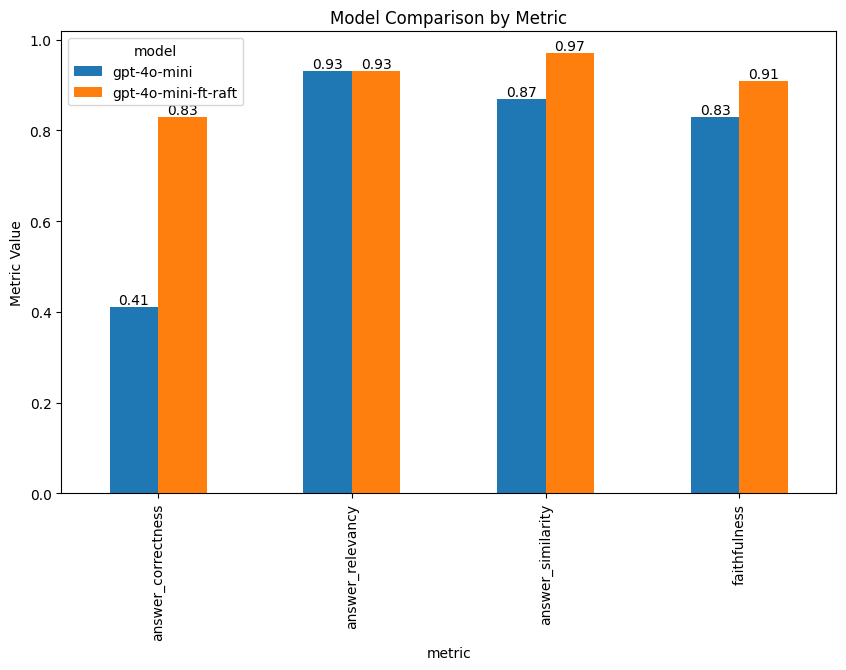

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your results_df DataFrame

# Reshape the DataFrame
melted_df = results_df.melt(id_vars='model', var_name='metric', value_name='value')
melted_df['value'] = melted_df['value'].round(2)

# Create the bar plot
pivoted_data = melted_df.pivot_table(index='metric', columns='model', values='value')
ax = pivoted_data.plot(kind='bar', figsize=(10, 6))

# Add value labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.ylabel('Metric Value')
plt.title('Model Comparison by Metric')
plt.show()